# Example usage of `pistis`
This notebook shows how to use `pistis` in a development environment for plotting.

In [6]:
from pistis import utils, plots
import pysam
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

We will generate plots with the test data from the `pistis` repository.

In [7]:
fastq_fname = '../tests/data/reads.fastq.gz'
bam_fname = '../tests/data/alignment.bam'

Next we will read in the fastq file and extract the data we need to create the GC conent. quality vs read length and quality per pase plots.

In [8]:
with pysam.FastxFile(fastq_fname) as fastq_file:
    (gc_content,
     read_lengths,
     mean_quality_scores,
     bins_from_start,
     bins_from_end) = utils.collect_fastq_data(fastq_file)

Now we will gather the values we need for the percent identity plot from the BAM file.

In [9]:
perc_identities = utils.sam_percent_identity(bam_fname)

Let's do some plotting!

## GC content

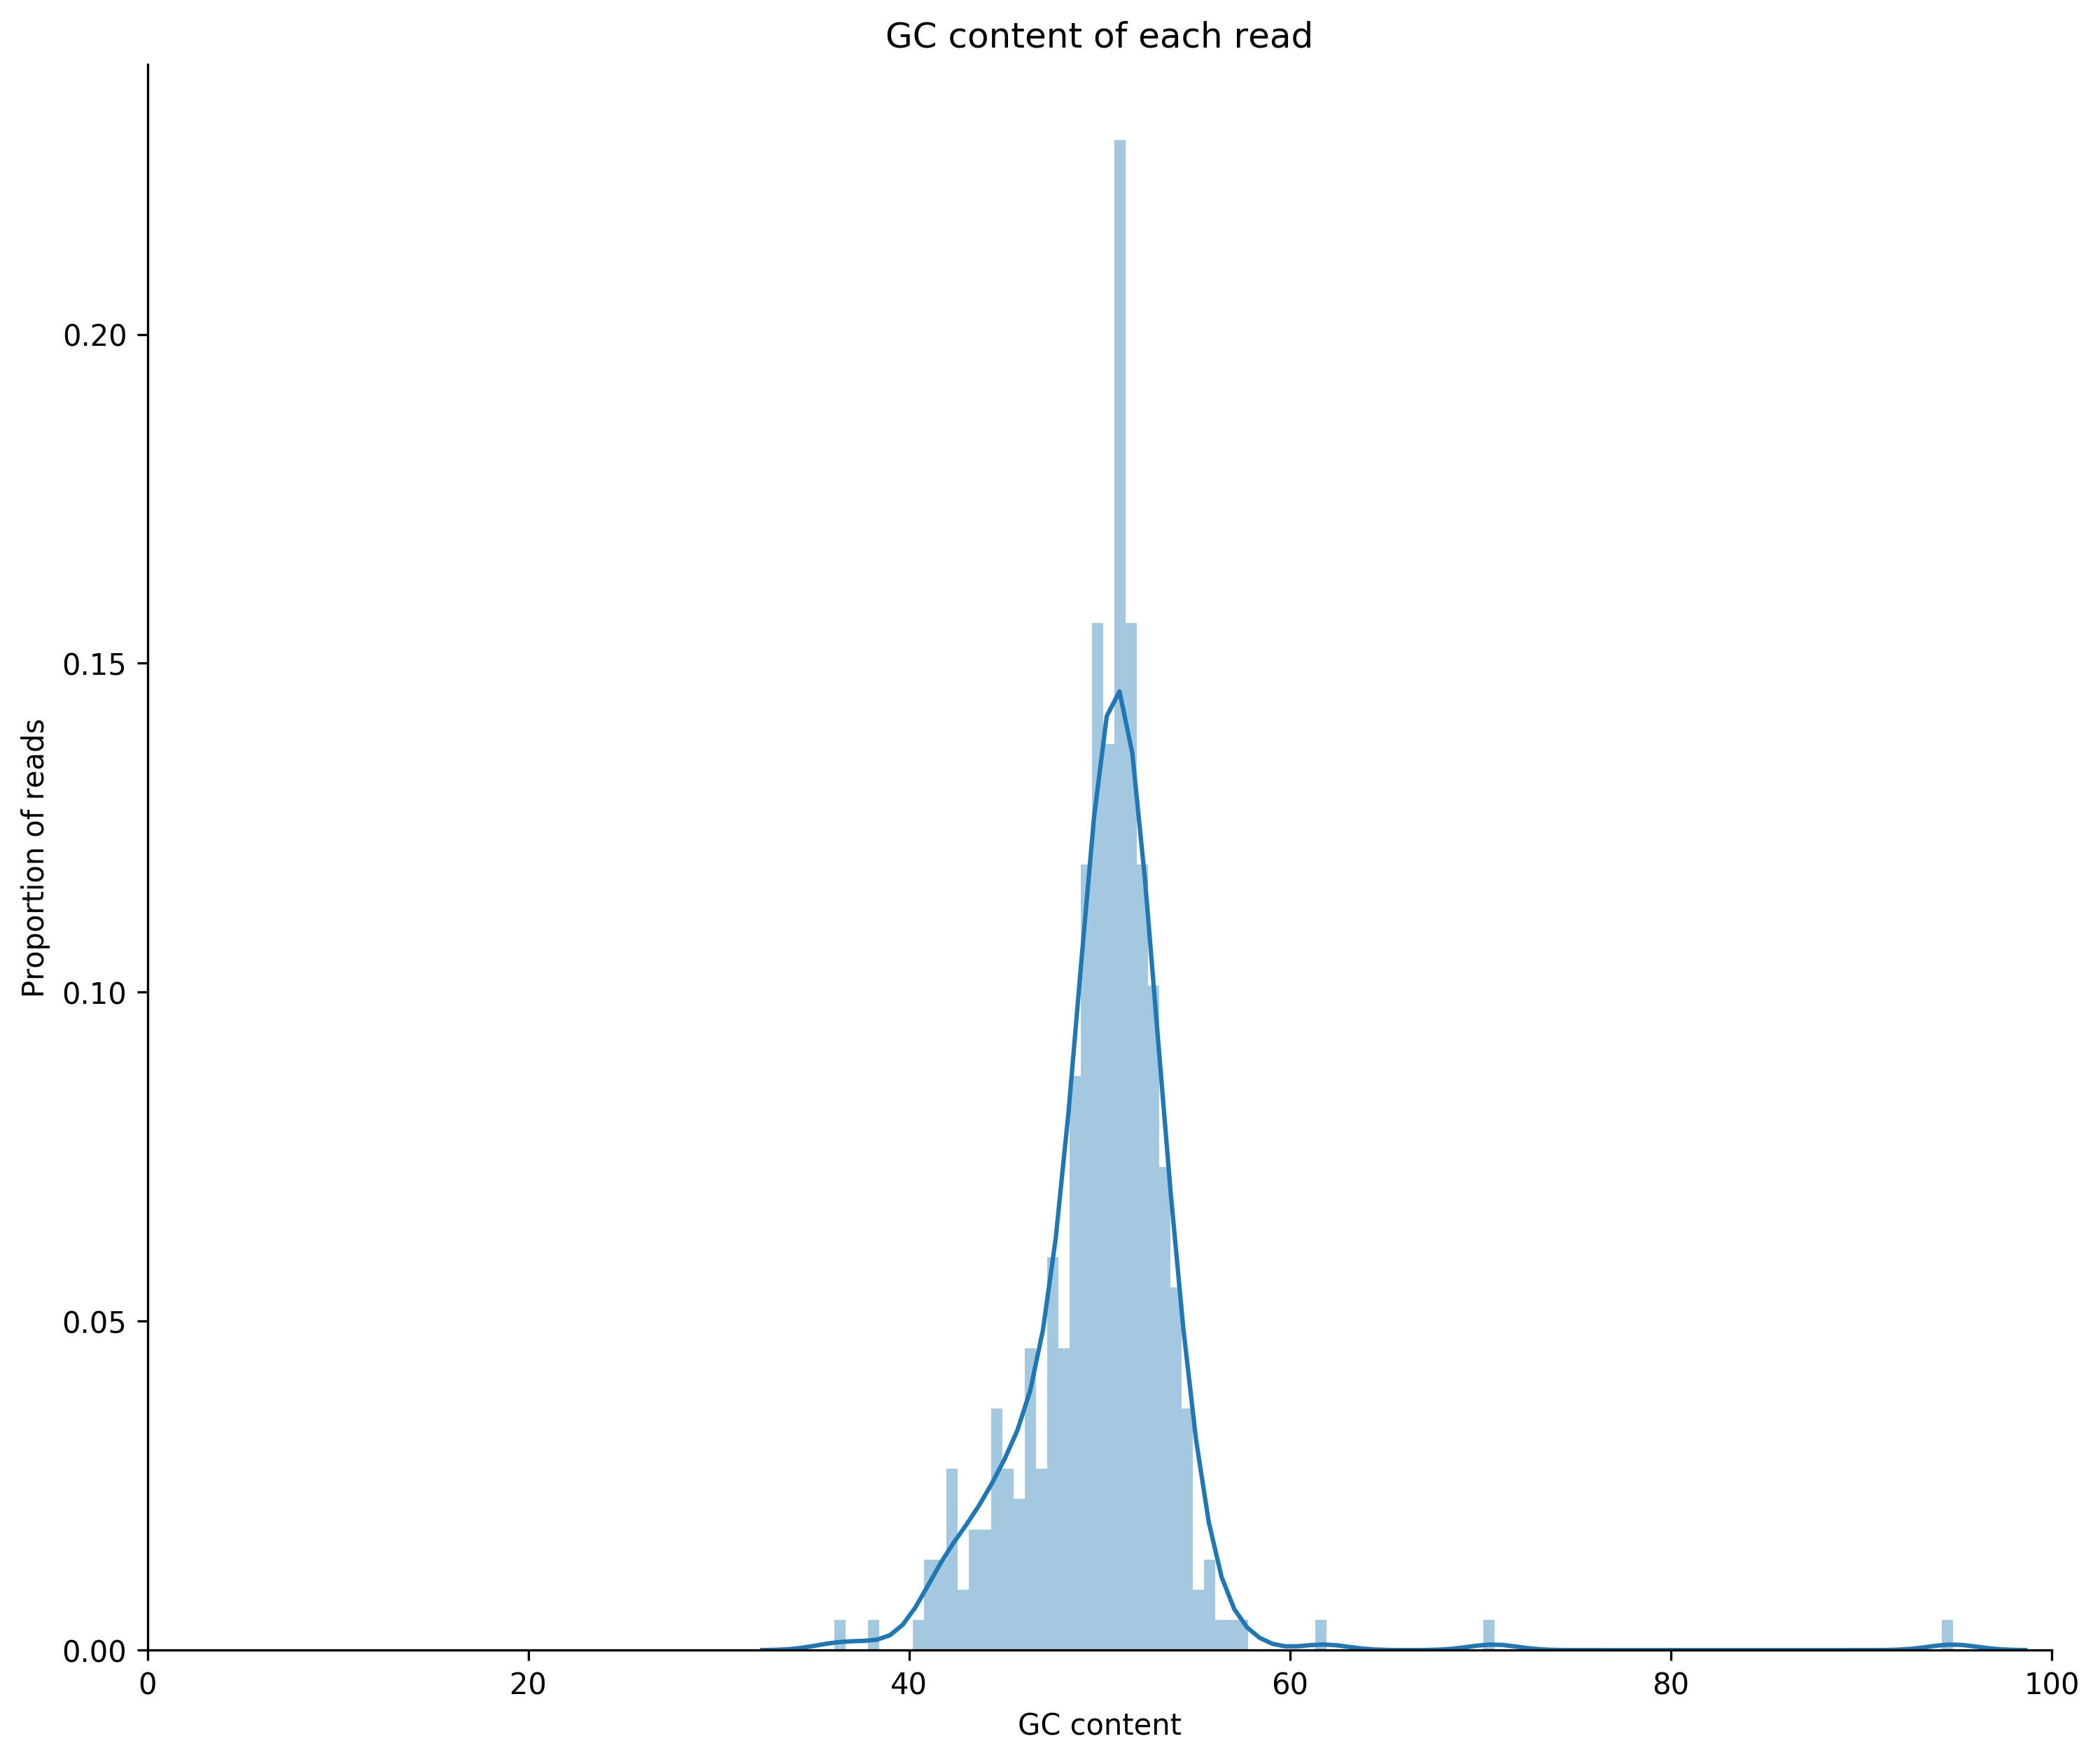

In [11]:
p = plots.gc_plot(gc_content)
# the commented line below is an example of how you can save this as a PNG
# p.savefig('gc_content.png', format='.png')

## Length versus mean quality score for each read

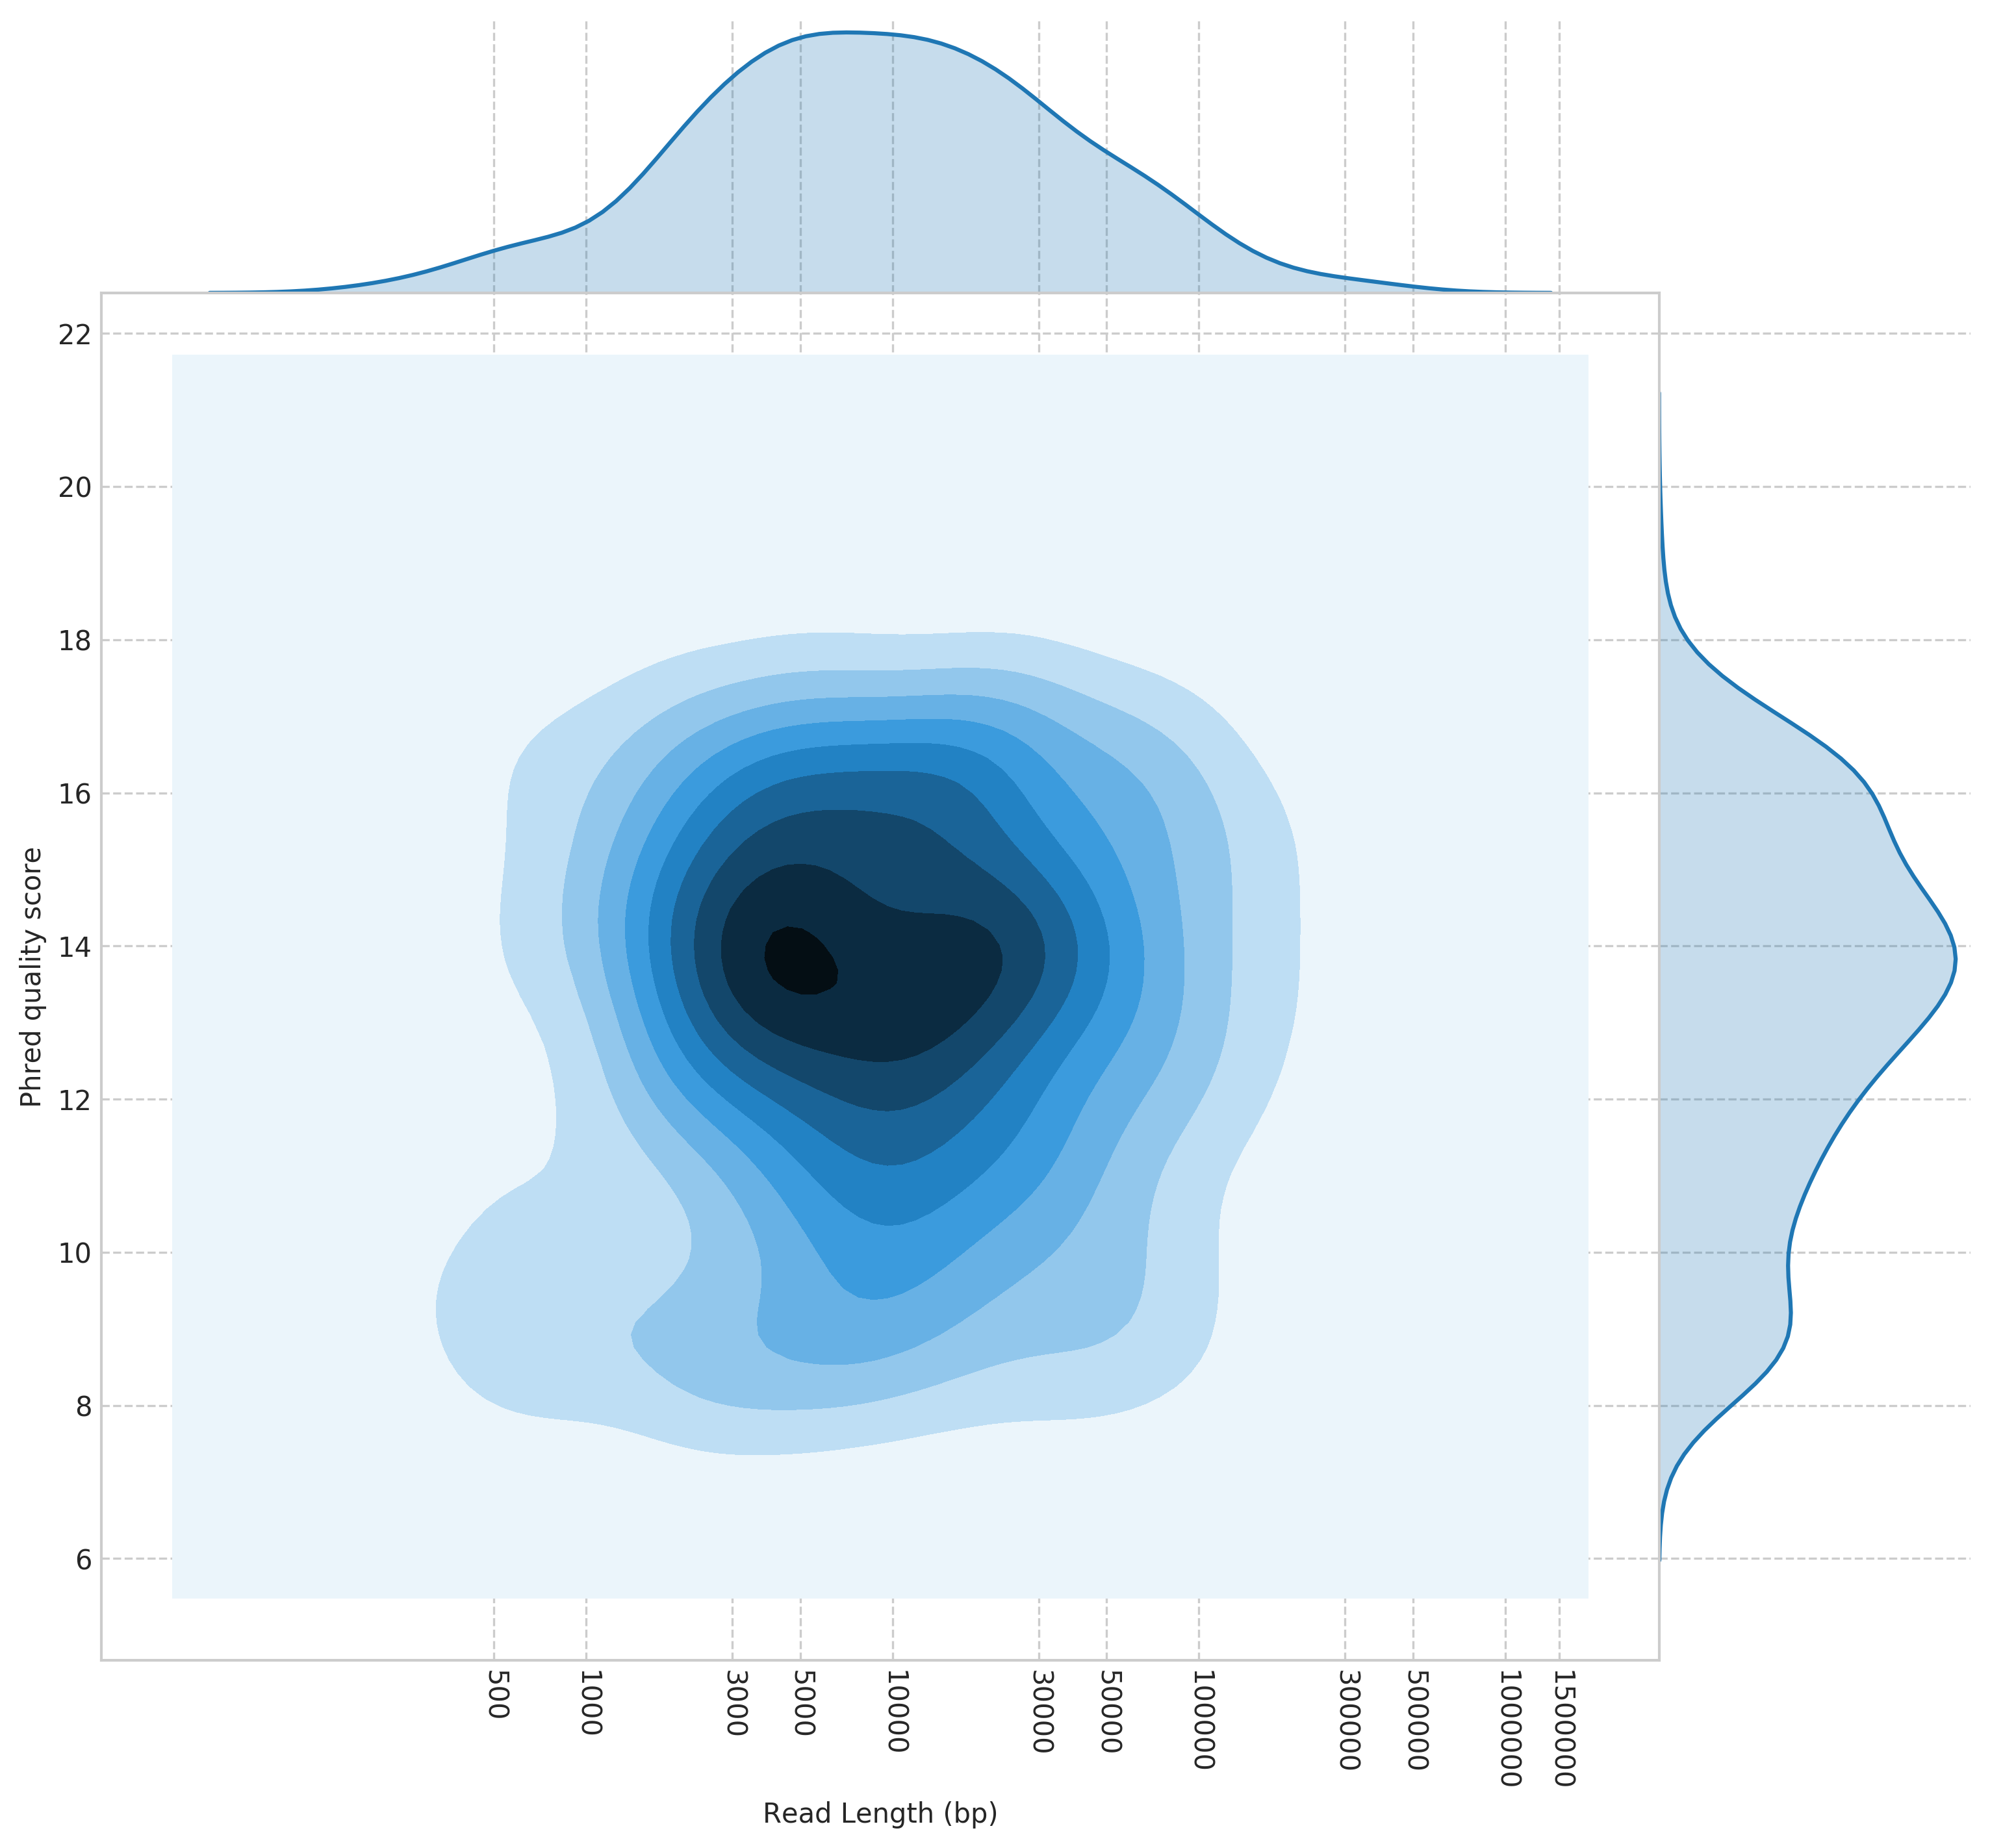

In [12]:
p = plots.length_vs_qual_plot(read_lengths, mean_quality_scores)

**Or if you prefer hex bins...**

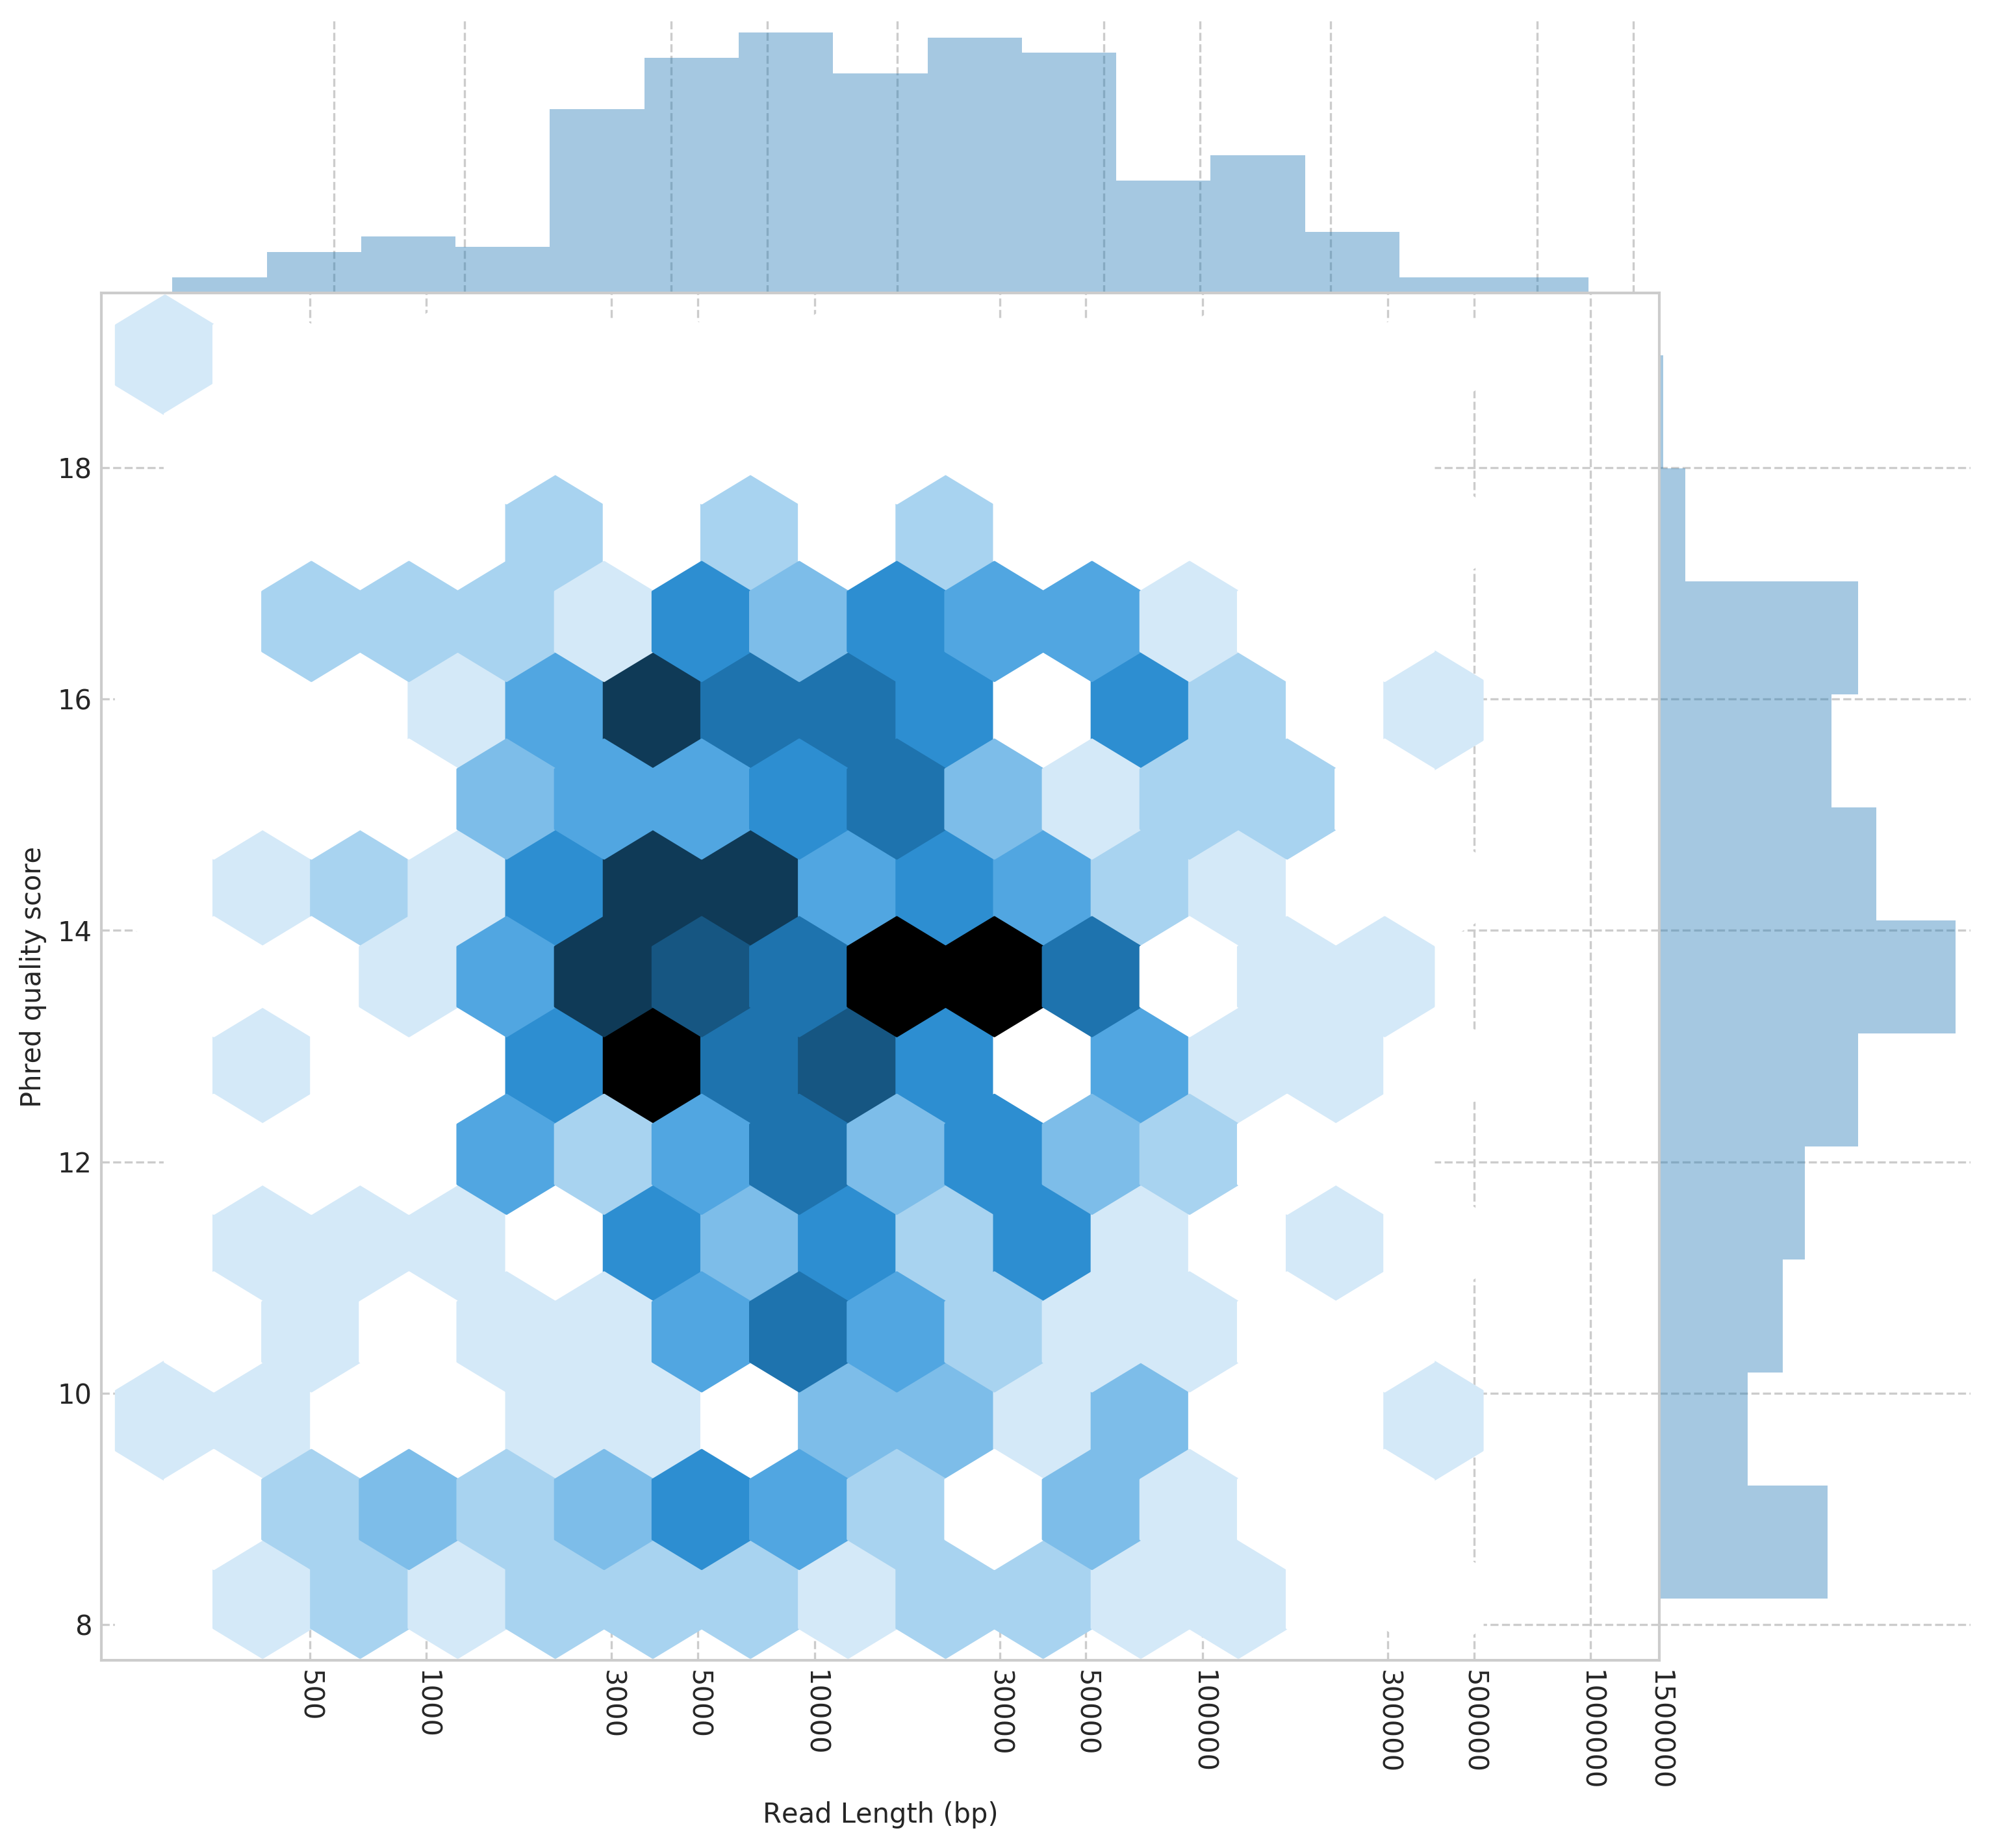

In [13]:
p = plots.length_vs_qual_plot(read_lengths, mean_quality_scores, kind='hex')

**Or scatter plot...**

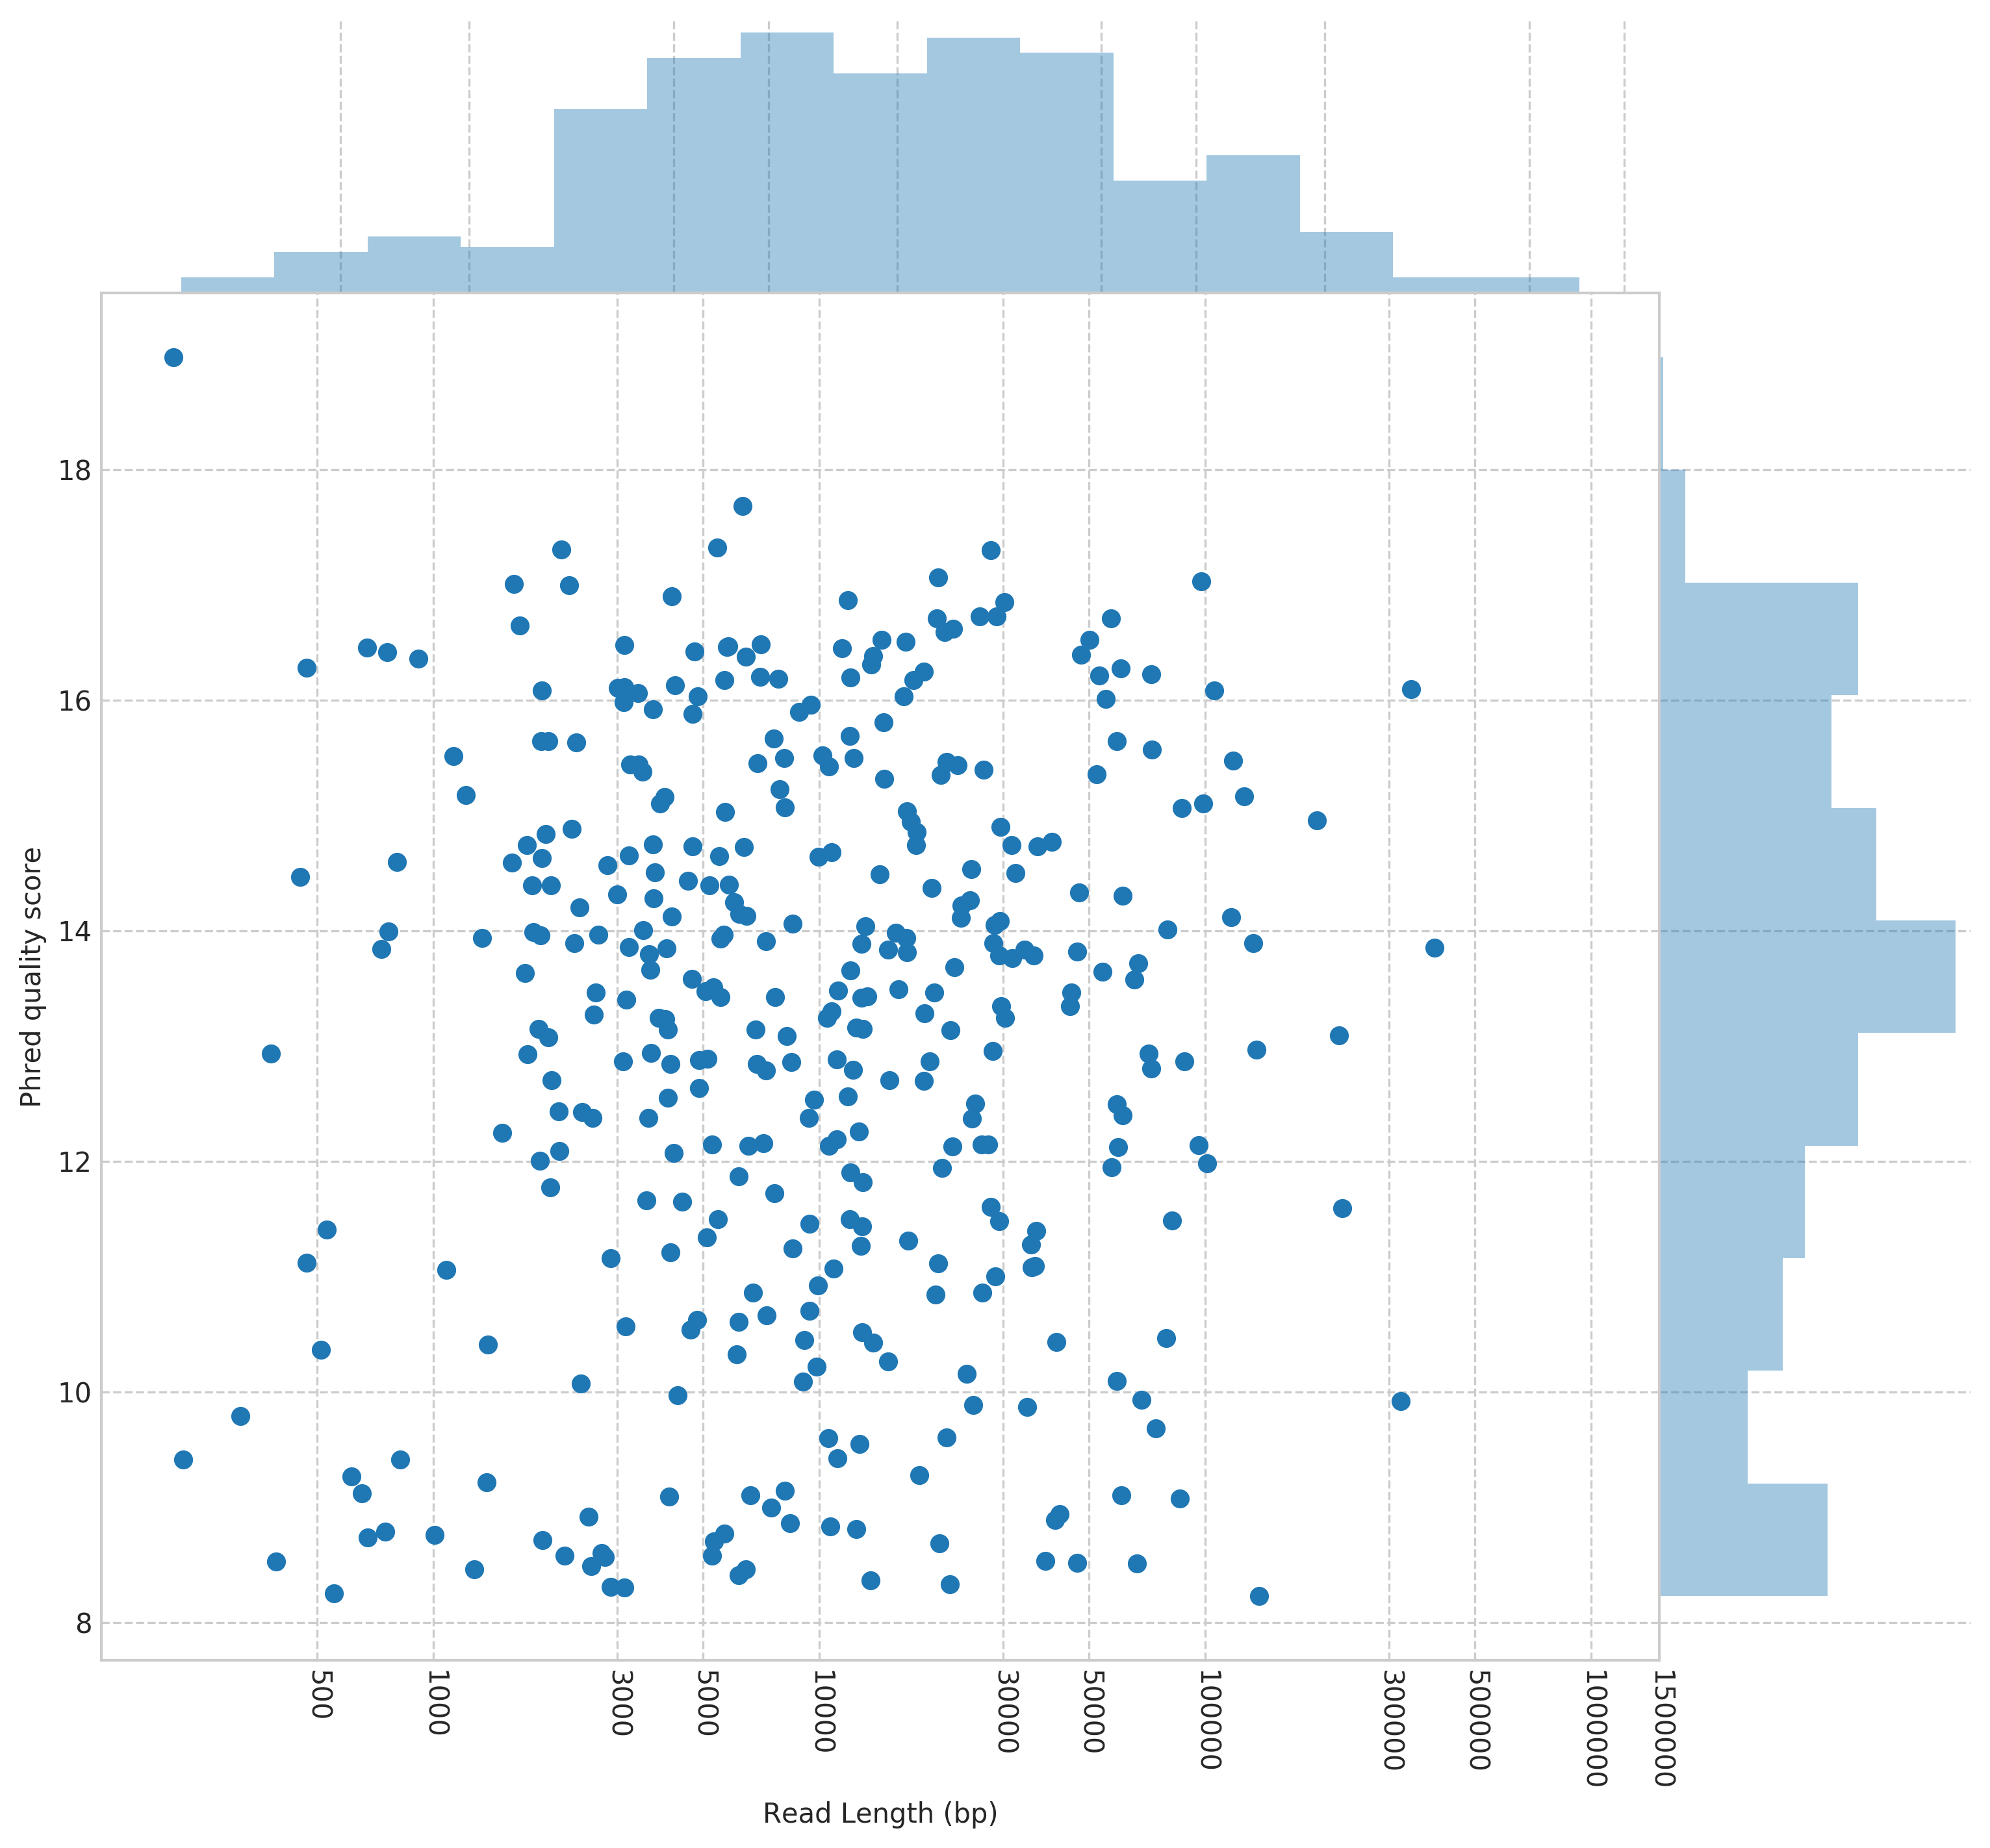

In [14]:
p = plots.length_vs_qual_plot(read_lengths, mean_quality_scores, kind='scatter')

**Without log transformed read length...**

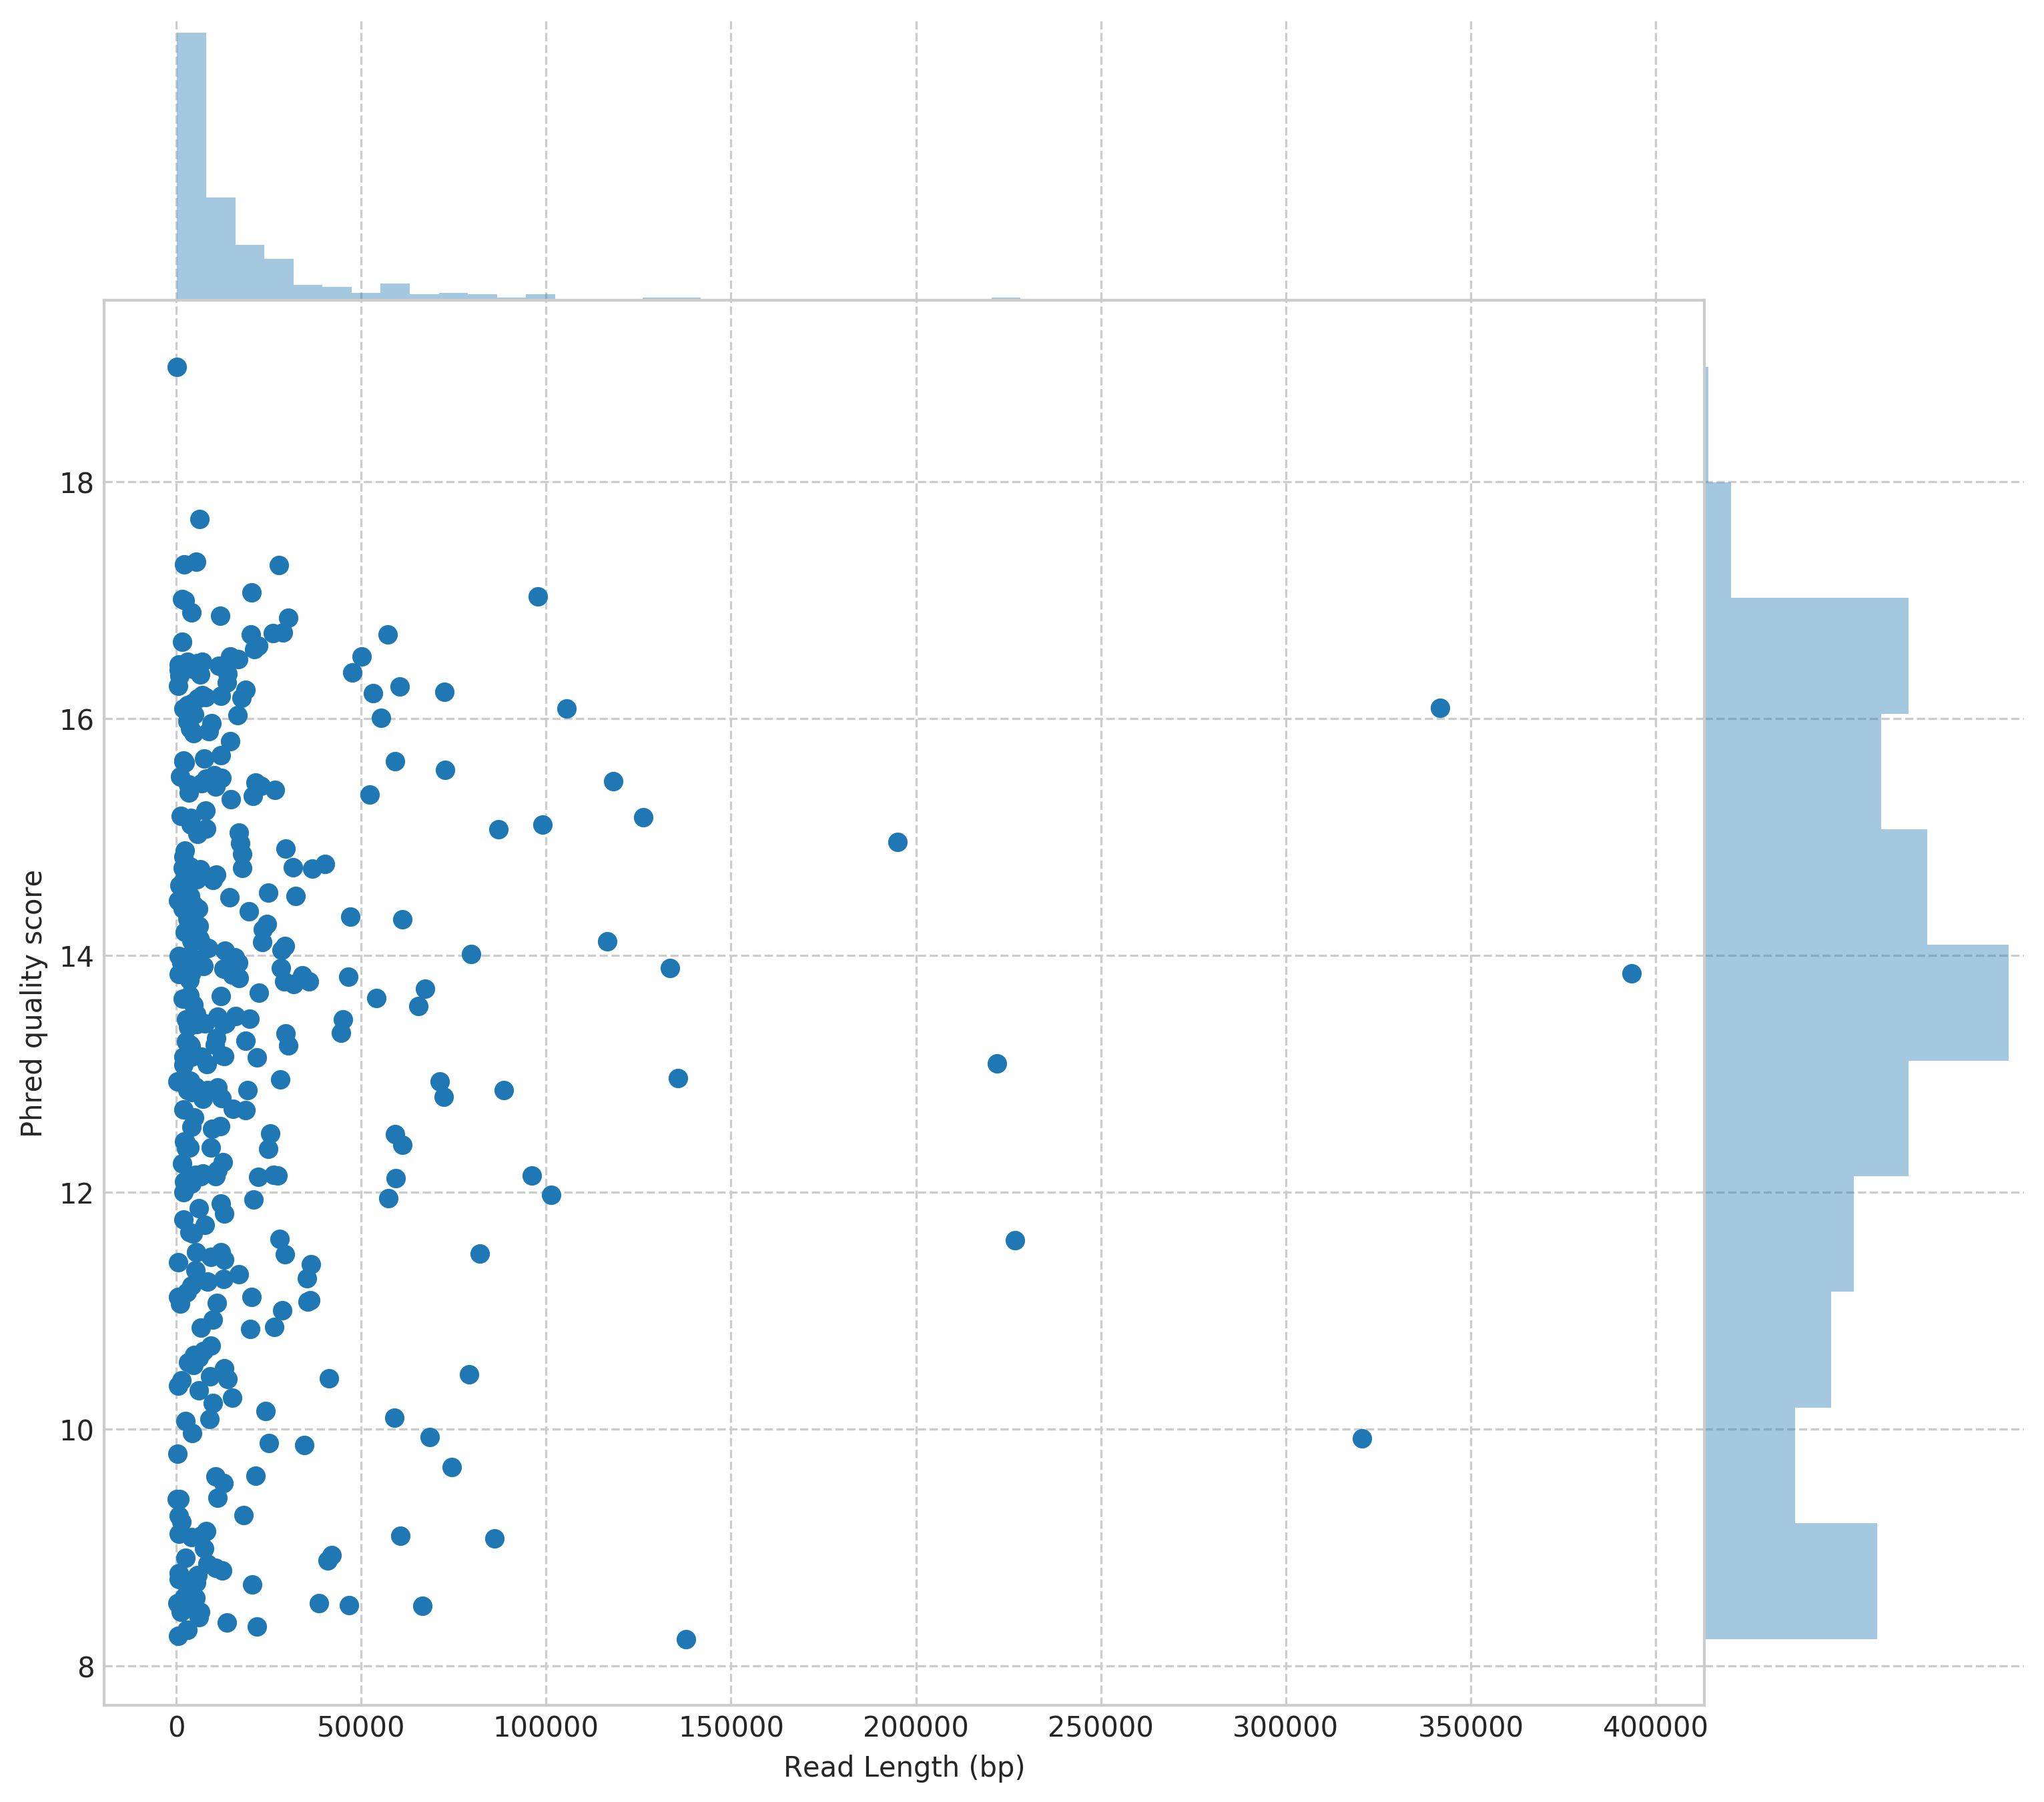

In [20]:
p = plots.length_vs_qual_plot(read_lengths, mean_quality_scores, log_length=False, kind='scatter')

## Base quality at positions from the start of each read

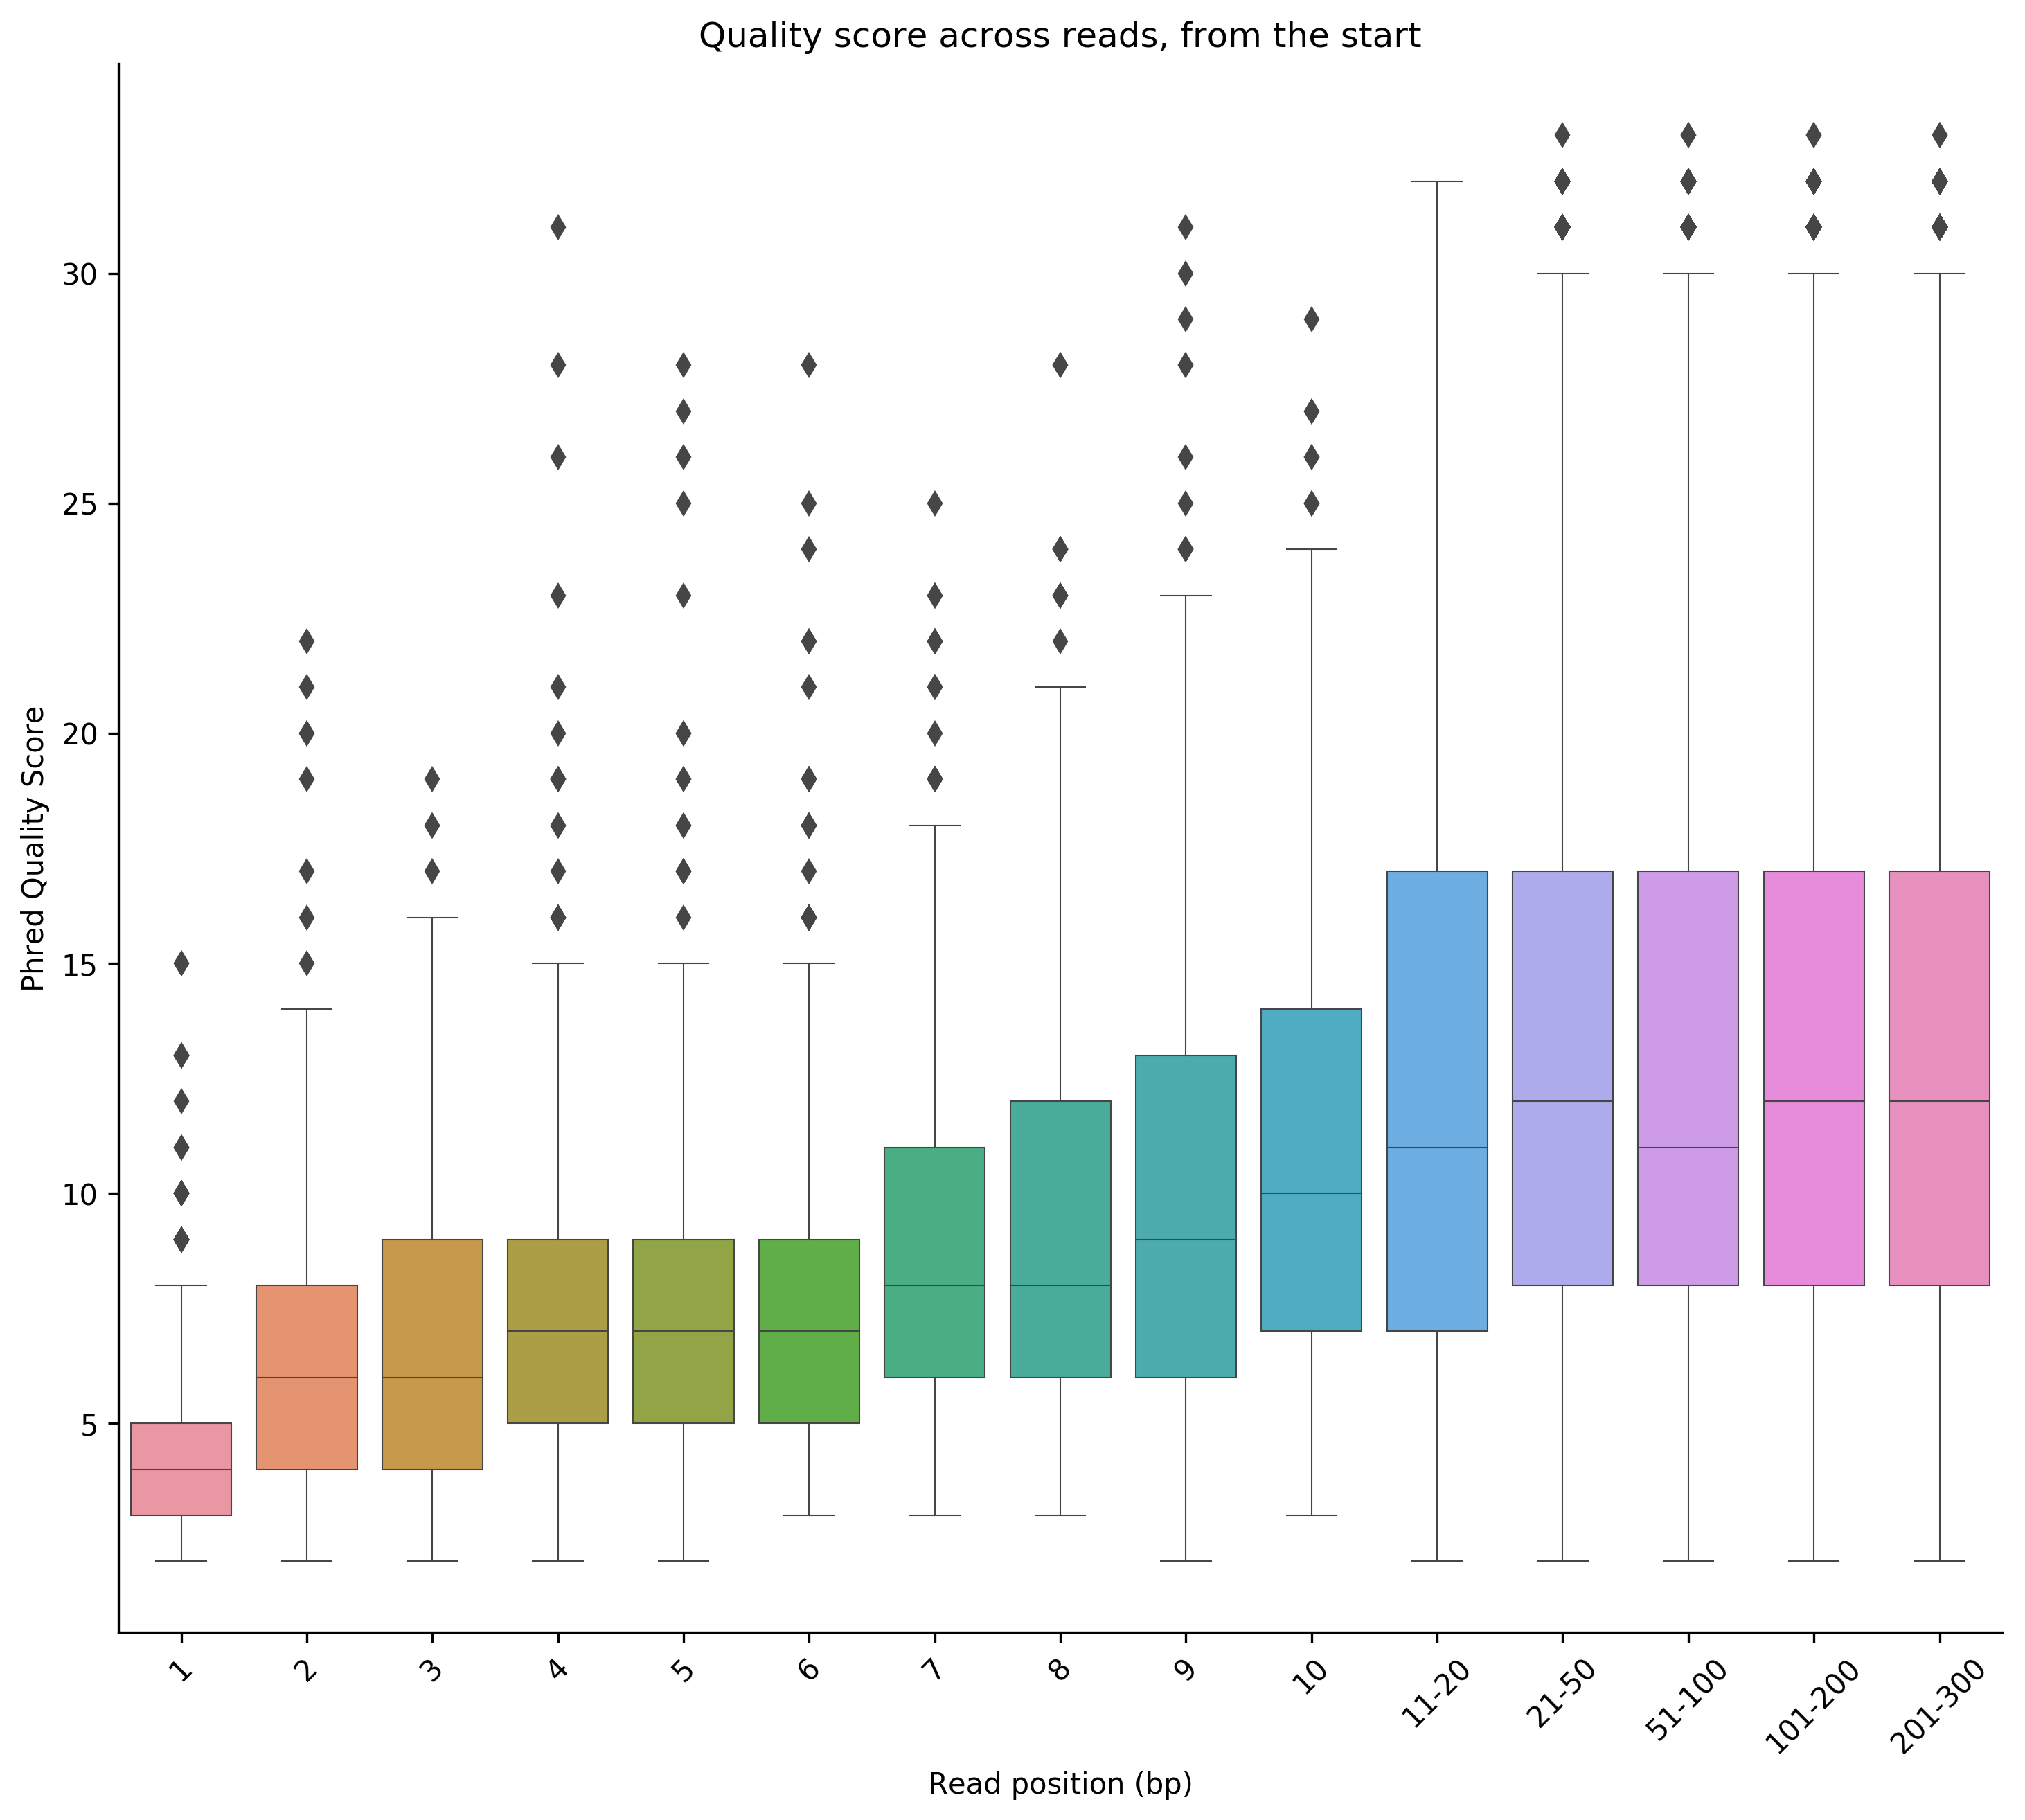

In [21]:
p = plots.quality_per_position(bins_from_start, from_end='start')

## Base quality at positions from the end of each read

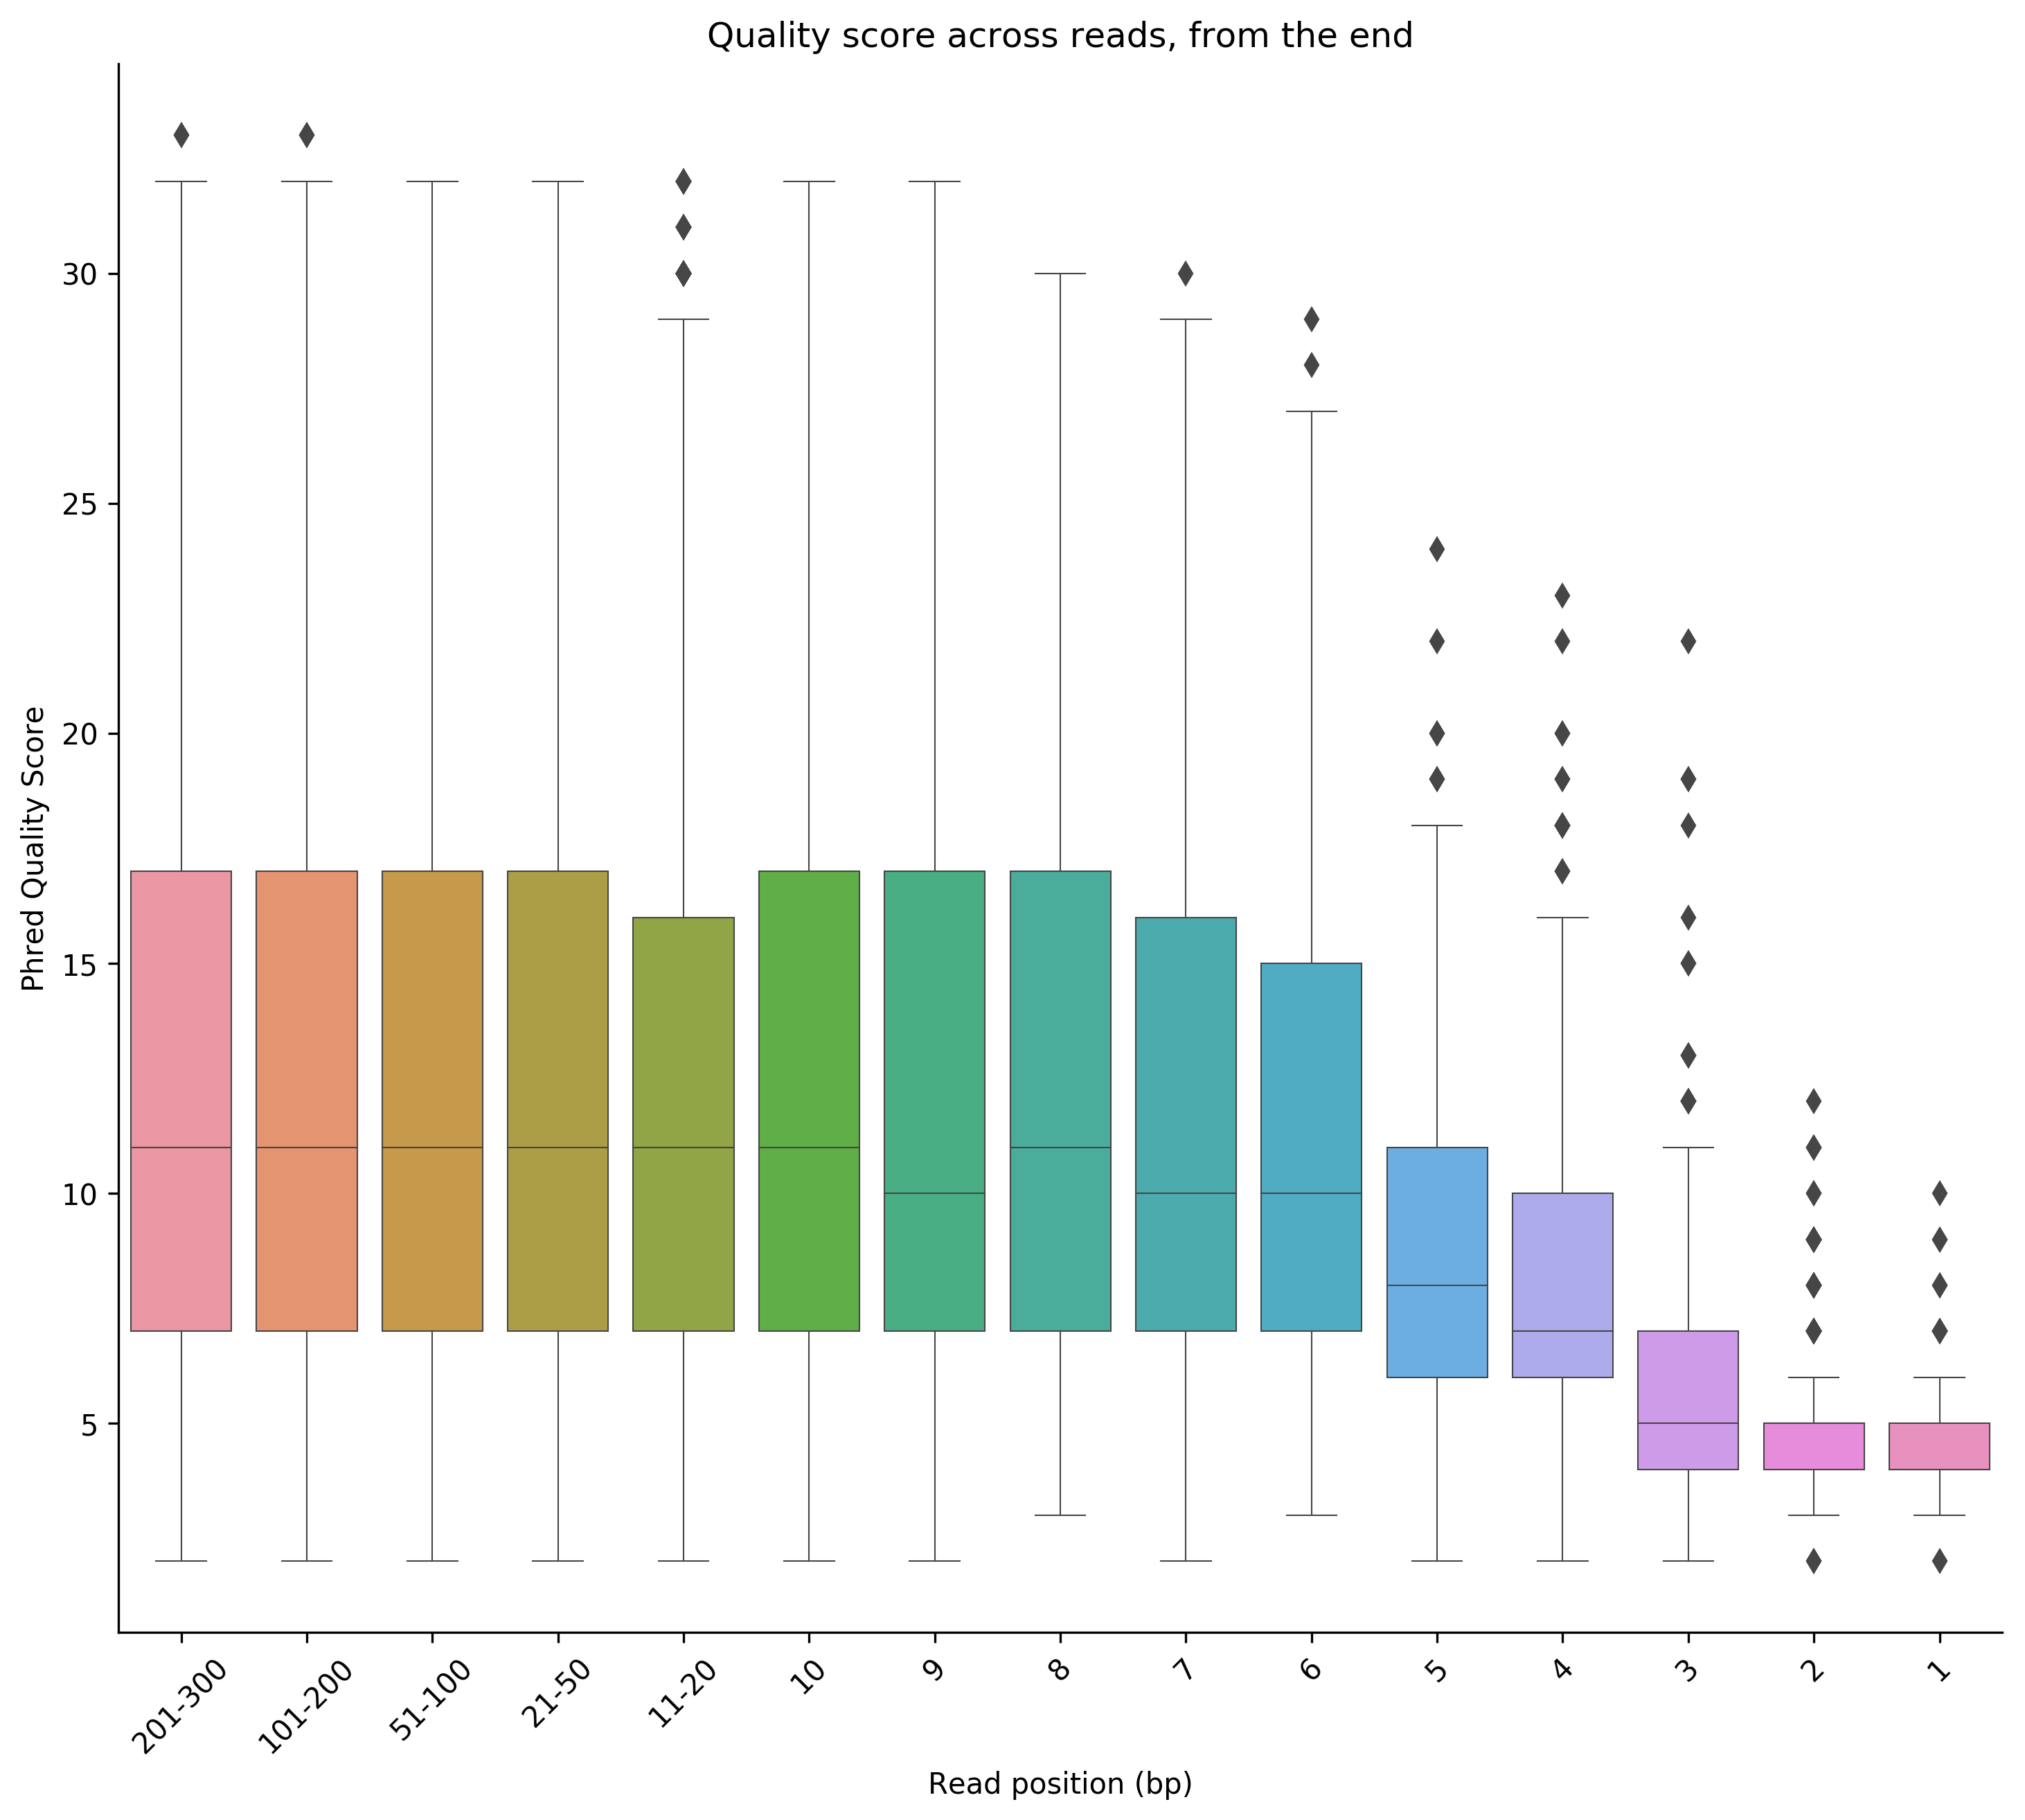

In [22]:
p = plots.quality_per_position(bins_from_end, from_end='end')

## Percent identity for each aligned read

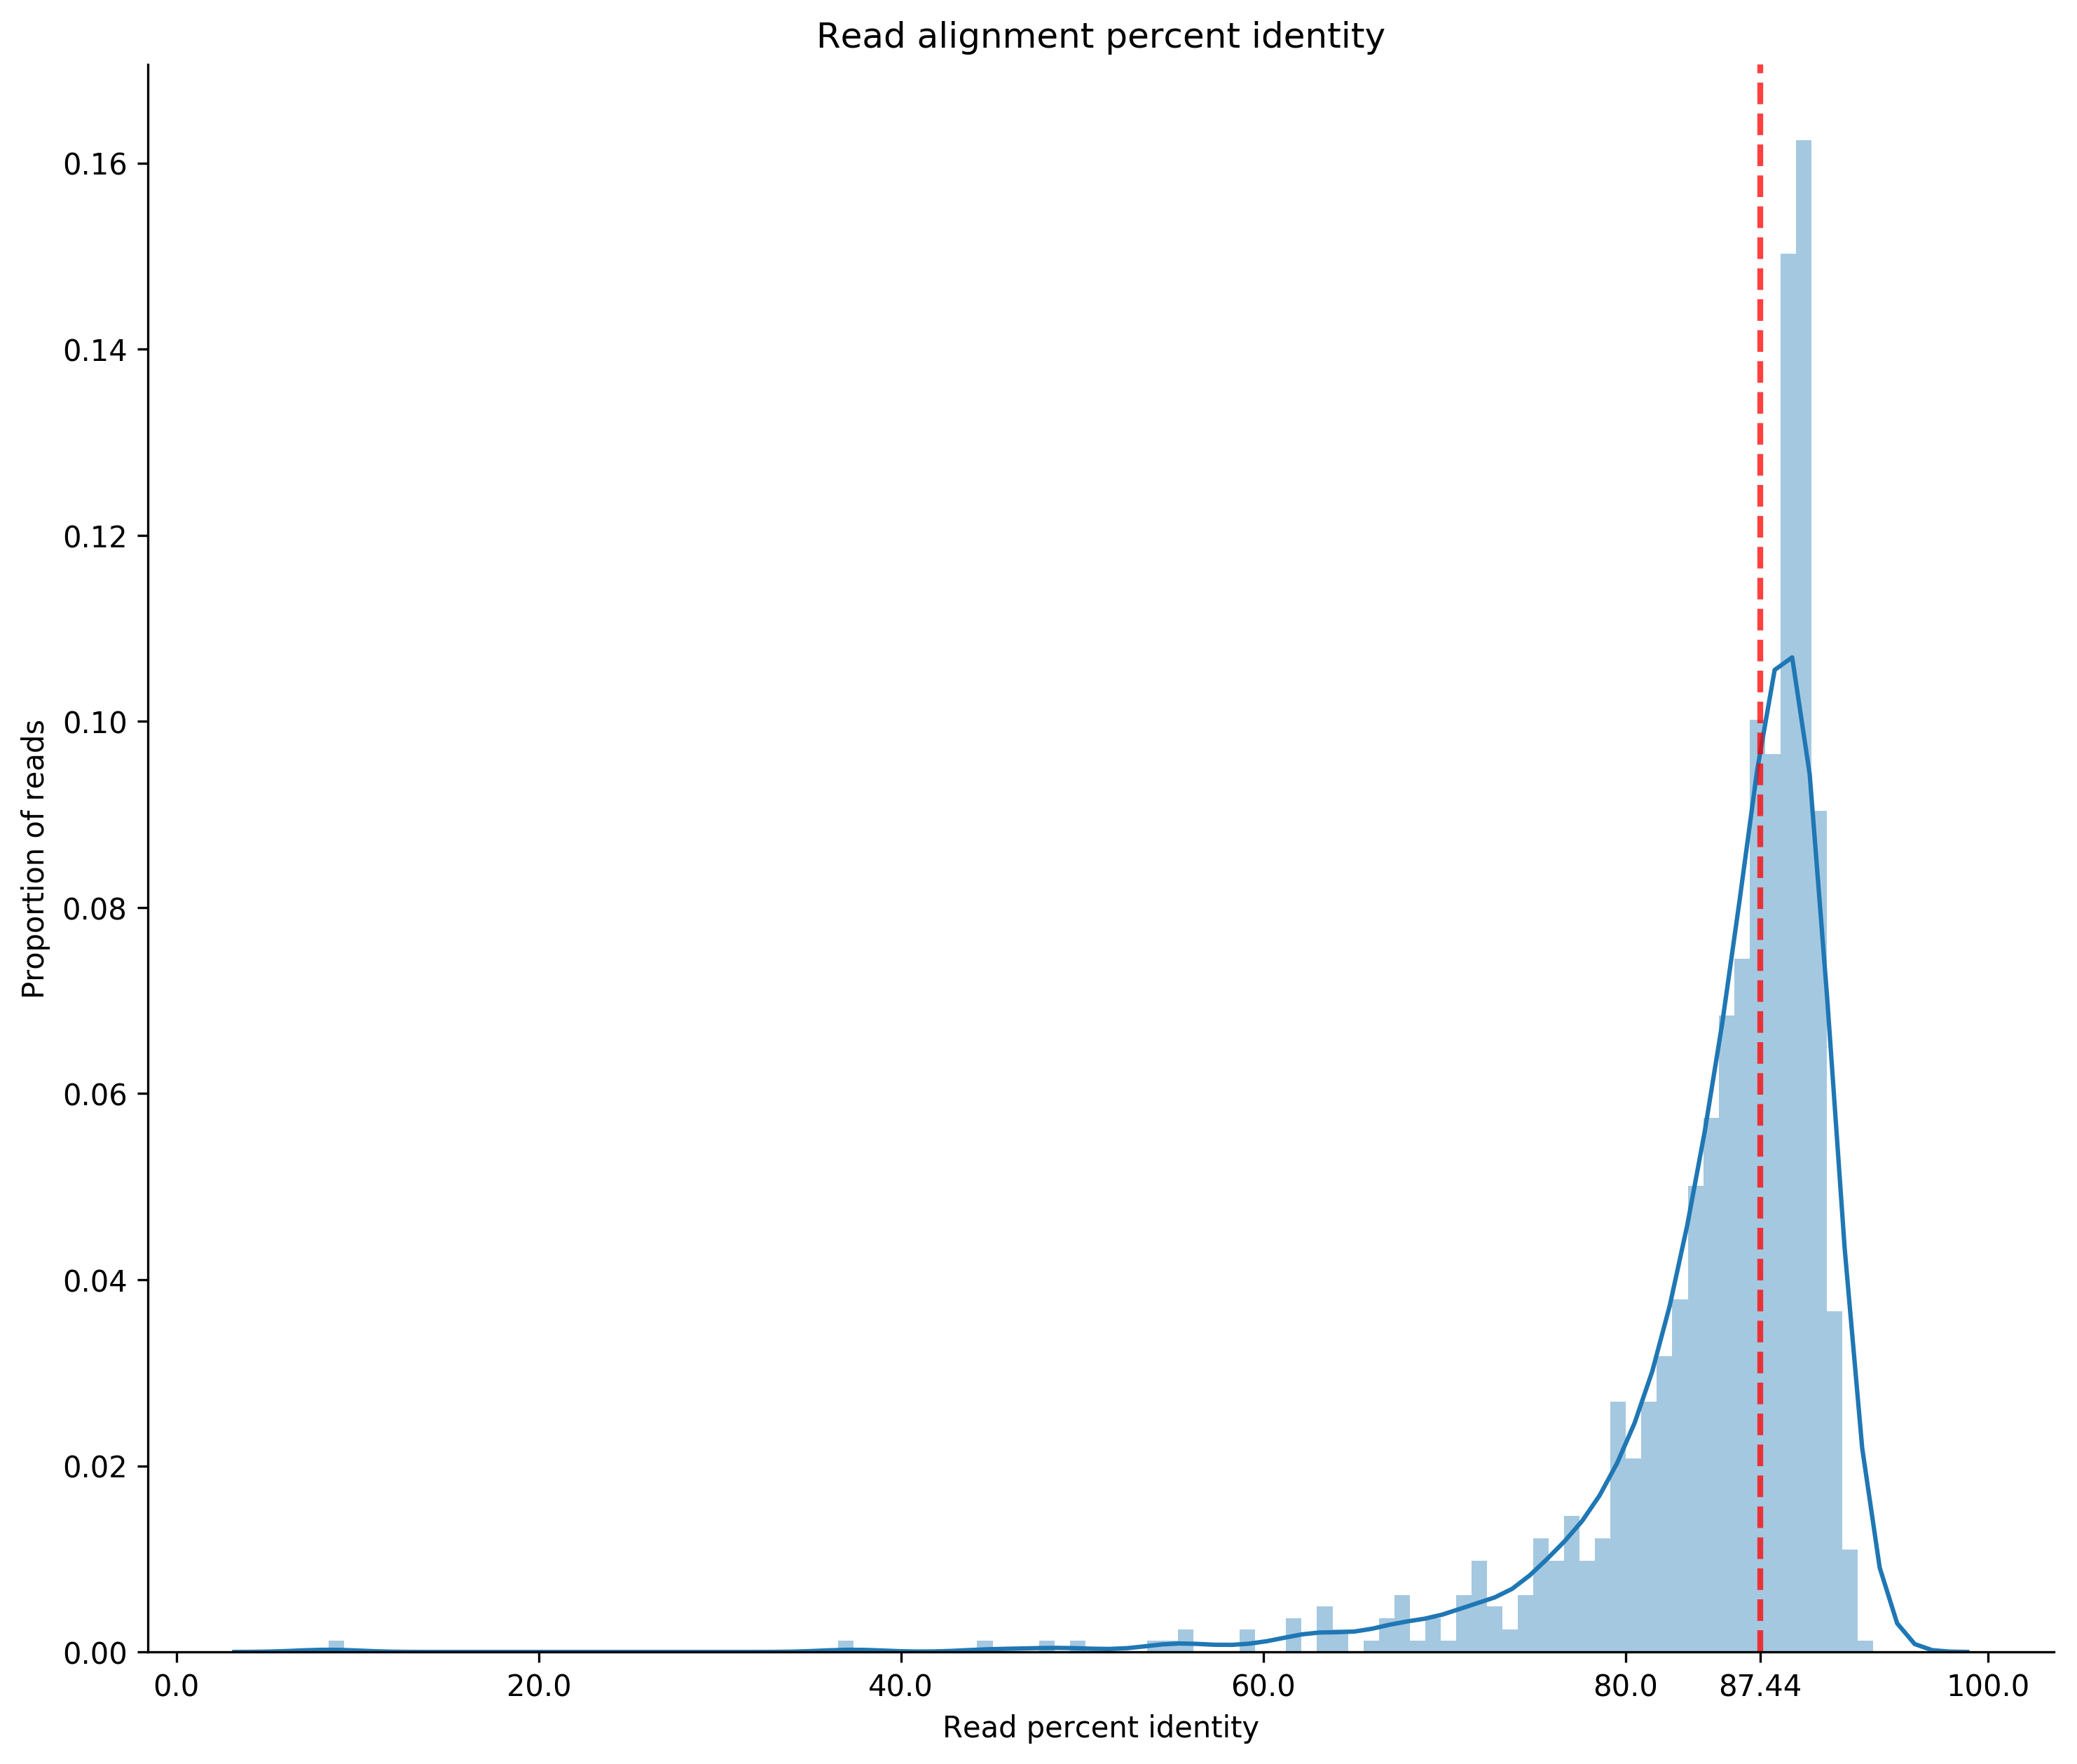

In [23]:
p = plots.percent_identity(perc_identities)